<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>

# Семинар 5

Теоретическая часть: [Лекция 5](https://github.com/BoberSA/PythonCourse/blob/master/Lecture_5/Lecture_5.ipynb)

# Темы семинара:

### 0. Pandas

### Задание 0. Форма орбиты

Дан текстовый файл **traj.txt** с векторами состояния космического аппарата.
В столбцах содержатся координаты, скорости, время: $x, y, z, v_x, v_y, v_z, t$
Координаты даны в безразмерном виде: одной безразмерной единице соответствует R км (число R указано в заголовке файла).

Требуется:

1. Загрузить файл в pandas DataFrame, переименовать столбцы в соосветствии с их содержимым
2. Отрисовать графики $y(x), z(x), z(y)$
3. Вычислить внешние размеры орбиты в км
4. Вычислить внутренние размеры апертуры орбиты в километрах
    - для осей $x, z$: взять 50-100 точек, наиболее близких к плоскости $y=0$ и для них вычислить $ap_x = min(x|x>0)-max(x|x<0)$, $ap_z = min(z|z>0)-max(z|z<0)$; выбранные точки изобразить на графиках y(x), z(x) вместе с орбитой (только точки, без линий)
    - для оси $y$: взять 50-100 точек, наиболее близких к плоскости $v_y=0$ и для них вычислить $ap_y = min(y|y>0)-max(y|y<0)$; выбранные точки изобразить на графике y(x) вместе с орбитой (только точки, без линий)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#[mu=3.001348e-06, L2=1.010032e+00, R=1.496000e+08, x0=-3.500000e+05km(+L2), z0=2.000000e+05km]

In [2]:
cols = "x y z vx vy vz t".split()

In [84]:
data = pd.read_csv('traj.txt', sep=' ', skiprows=range(0, 3), header = None, names=cols)
data.tail()

,x,y,z,vx,vy,vz,t
1303,1.009537,0.004507,-0.002240,0.003124,-0.002932,-0.005498,156.052392
1304,1.010028,0.003824,-0.003021,0.002877,-0.005437,-0.004112,156.214177
1305,1.010459,0.002739,-0.003569,0.002219,-0.007440,-0.002416,156.381198
1306,1.010748,0.001398,-0.003819,0.001239,-0.008696,-0.000596,156.546125
1307,1.010856,-0.000155,-0.003754,-0.000002,-0.009124,0.001342,156.718854


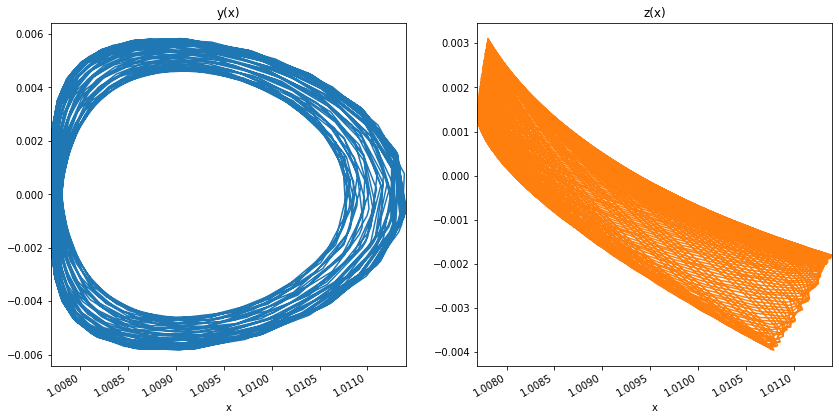

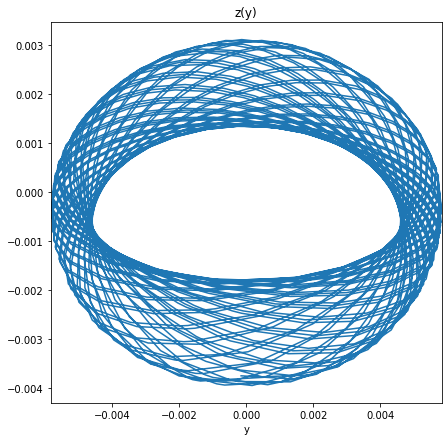

In [115]:
data.plot(x='x', y=['y', 'z'], subplots=True, legend=False, title=["y(x)","z(x)"],layout=(1,2), figsize=(14,7))
data.plot(x='y', y='z',legend=False,figsize=(7,7), title = "z(y)")

In [ ]:
R=1.496000e+08

In [99]:
d = data.assign(absy=data["y"].abs())
d = d.nsmallest(n=100, columns=['absy'])
xmin = d[d["x"] > 0]["x"].min()
if xmin is np.nan:
    xmin = 0
xmax = d[d["x"] < 0]["x"].max()
if xmax is np.nan:
    xmax = 0
apx = xmin - xmax

zmin = d[d["z"] > 0]["z"].min()
if zmin is np.nan:
    zmin = 0
zmax = d[d["z"] < 0]["z"].max()
if zmax is np.nan:
    zmax = 0
apz = zmin - zmax

print(f"apx={apx}, apz={apz}")

apx=1.007692157267, apz=0.003140586096998941


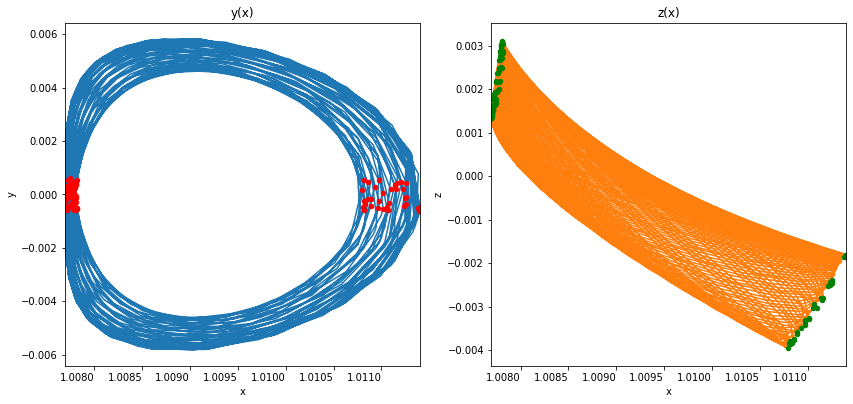

In [116]:
ax = data.plot(x='x', y=['y', 'z'], subplots=True, legend=False, title=["y(x)","z(x)"],layout=(1,2), figsize=(14,7), zorder=-1)
d.plot.scatter(x='x', y='y', color="red", ax=ax[0][0])
d.plot.scatter(x='x', y='z', color="green", ax=ax[0][1])

In [118]:
d1 = data.assign(absvy=data["vy"].abs())
d1 = d1.nsmallest(n=100, columns=['absvy'])

ymin = d1[d1["y"] > 0]["y"].min()
if ymin is np.nan:
    ymin = 0
ymax = d[d["y"] < 0]["y"].max()
if ymax is np.nan:
    ymax = 0
apy = ymin - ymax
print(apy)

0.004674160685842011


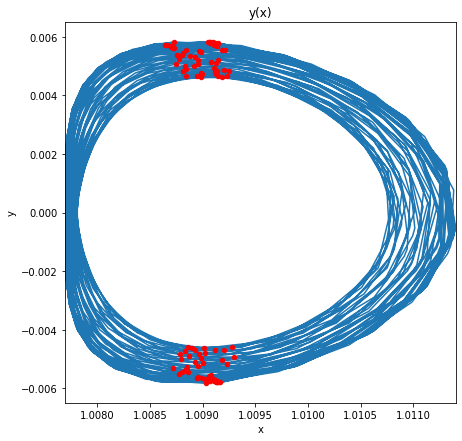

In [120]:
ax1 = data.plot(x='x', y='y',legend=False,figsize=(7,7), title = "y(x)", zorder=-1)
d1.plot.scatter(x='x', y='y', color="red", ax=ax1)